In [ ]:
#Purpose

#With the provided data set determine the the most valuable player in the 2021 FIFA World Cup.  To drive the analysis
#Only a certain set of factors will be evaluated.  The factors choose were done with the purpose of looking at a micro 
#To macro in terms of a sigular skill that is then involved in compound overall statistic to describe the overall 
#Performance of a player and from this hierarchy derive the best overal player.

In [103]:
#Needed Libraries for Cleaning Data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [104]:
#Data Table for Analysis: Player Statistics for 2021 FIFA World Cup
#This error did not present intitially but keeps doing so now that have tried making this analysis for the 5th time***
#I do not know how I messed up importing the data but this is the best I can get it to run.

data = pd.read_csv('/Users/testuser/data_mid_bootcamp_project_FIFA_MoneyBall/fifa21_male2.csv')

/var/folders/54/kb1g5s7n5ds6km5w3p2cxbsr0000gq/T/ipykernel_22903/679626008.py:1: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/testuser/data_mid_bootcamp_project_FIFA_MoneyBall/fifa21_male2.csv')


In [105]:
#All Data Pulled

data.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [106]:
data.shape 
# based upon the output below we see there is a vast amount of data, the next step in the process,
#is to clean the data to expell uncessary information and make the data scalable.
#output shows 17,125 rows and 107 columns.

(17125, 107)

In [107]:
#Evalauating for Null Vallues

data.isnull().sum()

ID             0
Name           0
Age            0
OVA            0
Nationality    0
              ..
CB             0
RCB            0
RB             0
GK             0
Gender         0
Length: 107, dtype: int64

In [108]:
data['Agility'].replace({np.NaN:data['Agility'].mean()},inplace=True)
#Agility will have all NaN vales replaced with a zero, as this is the only column desired for analysis, all others
#Will be dropped.

In [109]:
data = data.drop (['ID' , 'Club' , 'BOV' , 'BP' , 'Position' , 'Player Photo' , 'Club Logo' , 'Hits' , 'Flag Photo' , 'POT' , 'Team & Contract' , 'Height' , 'Weight', 'foot' , 'Growth' , 'Joined' , 'Loan Date End' , 'Value' , 'Wage' , 'Release Clause' , 'Contract' , 'Crossing' , 'Heading Accuracy' , 'Short Passing', 'Volleys' , 'Dribbling' , 'Curve' , 'Long Passing' , 'Movement' , 'Acceleration' , 'Sprint Speed' , 'Reactions' , 'Balance' , 'Power' , 'Shot Power' , 'Jumping' , 'Stamina' , 'Strength' , 'Long Shots' , 'Mentality' , 'Aggression' , 'Interceptions' , 'Positioning'  , 'Vision' , 'Composure' , 'Defending' , 'Marking' , 'Standing Tackle' , 'Goalkeeping' , 'GK Diving' , 'GK Handling' , 'GK Kicking' , 'GK Positioning' , 'GK Reflexes' , 'Base Stats' , 'W/F' , 'SM' ,  'A/W' , 'D/W' , 'Composure' , 'IR' , 'LS' , 'ST' , 'RS' , 'LW' , 'LF' , 'CF' , 'RF' , 'RW' , 'LAM' , 'CAM' , 'RAM' , 'LM' , 'LCM' , 'CM' , 'RCM' , 'RM' , 'LWB' , 'LDM' , 'CDM' , 'RDM' , 'RWB' , 'LB' , 'LCB' , 'CB' , 'RCB' , 'RB' , 'GK' , 'Gender'], axis =1)

In [110]:
data = data.drop (['Sliding Tackle'], axis =1)
#In viewing the table above, the following columns can be dropped because they do not provided information that 
#is beneficial for analysis because the data provided is not of any statistical use.
# EX. player photo, club logo

In [111]:
data.shape

(17125, 18)

In [112]:
data.head()

,Name,Age,OVA,Nationality,Attacking,Finishing,Skill,FK Accuracy,Ball Control,Agility,Penalties,Total Stats,PAC,SHO,PAS,DRI,DEF,PHY
0,G. Pasquale,33,69,Italy,313,50,338,60,71,68.000000,50,1929,71,59,70,71,68,69
1,Luis García,37,71,Spain,337,64,369,79,71,62.000000,75,1906,53,69,73,69,58,63
2,J. Cole,33,71,England,337,64,387,77,78,71.000000,66,1770,45,68,76,77,36,52
3,D. Yorke,36,68,Trinidad &amp; Tobago,264,70,255,46,77,64.602273,70,1348,61,66,66,69,47,60
4,Iniesta,36,81,Spain,367,69,408,70,90,79.000000,71,2014,58,70,85,85,63,59


In [113]:
#Define for Future Comparisons

data.dtypes
#With the remaining data we will determine the MVP
#OVA: Offensive Value Added, evaluates a player’s attacking contribution in numbers
#Attacking: make a forceful attempt to score a goal or point or otherwise gain an advantage against an opposing team        
#Finishing: Finishing is where you are working up close to the goal and most of the chances arefrom balls crossed        
#Skill: A shot is an attempt that is taken with the intent of scoring and is directed toward the goal
#FK Accuracy: used to measures the player's accuracy for taking Free Kicks. The higher the value the better the 
    #accuracy of a direct free kick on goal. 
#Penalties: a tie-breaking method in association football to determine which team is awarded victory in a match that
    #cannot end in a draw 
    
#Ball Control: This is when you get the ball and what you do with it when you first touch the ball.      
#Agility: Your ability to stop, start and change direction can be trained.          
        
#Total Stats       
#PAC: Sprint speed and acceleration.               
#SHO: A shot is an attempt that is taken with the intent of scoring and is directed toward the goal.                
#PAS: Passing               
#DRI: Dribbling               
#DEF: responsible for preventing the opposing team from scoring goals. They will pressure attackers on the opposing team
    #by intercepting passes and making tackles              
#PHY: a Player Attribute in FIFA that represents the physical and body status of a player. Players with high PHY rating, 
    #are able to win the physical battles on the pitch and maintain their fitness throughout a full match.                         

Name             object
Age               int64
OVA               int64
Nationality      object
Attacking         int64
Finishing         int64
Skill             int64
FK Accuracy       int64
Ball Control      int64
Agility         float64
Penalties         int64
Total Stats       int64
PAC               int64
SHO               int64
PAS               int64
DRI               int64
DEF               int64
PHY               int64
dtype: object

In [78]:
#new_cols = []
#for item in data.columns:
    #new_cols.append(item.lower().replace(' ', '_'))
    
#Not changing header names formatting because it adds the dropped columns back in and all the columns just removed 
#present again and I do not know why.**
#However below this is the code that would change remove the capitilaztion and spacing in each column heading name.

In [115]:
data=data[(data['OVA']>75)].reset_index(drop=True)  
#This anlysis is to pick the best overall MVP in the legague, therefore we are using this cleaning to remove players
#that are not of Gold status, which is the best of the best.  This is done because FIFA ranks there players in most
#Elite as Gold, to good at a Bronze level.  The categorization is based upon the following ranking Gold as 75 and
#above, Silver 65 - 74, and Bronze being 64 and below.  We are removing all rankings that are less that the Gold
#Standard of 75

In [117]:
data.shape  
#By dropping the categories we are able to compare individual statistics to their corresponding overall
#combination rating, example: Finishing and Shooting.  In doing these we can look at the top most elite
#players that have an OVA score of 75 or more. In looking at players of only gold status we are able to 
#have a much smaller data set to evaluate going from 17000rows to a much more managable data set just 
#under 2000 rows.It stands to reason that Gold status screening to find the best player as it evaluauates 
#for not just overall play but also accounts for  possessing or demonstrating an attribute that is uncommon,
#special, or unusual in the real world of football.

(1743, 18)

In [118]:
numericals = data.select_dtypes(np.number)
categoricals = data.select_dtypes(object)

In [119]:
data.info()  
#This command reveals the columns nature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1743 entries, 0 to 1742
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          1743 non-null   object 
 1   Age           1743 non-null   int64  
 2   OVA           1743 non-null   int64  
 3   Nationality   1743 non-null   object 
 4   Attacking     1743 non-null   int64  
 5   Finishing     1743 non-null   int64  
 6   Skill         1743 non-null   int64  
 7   FK Accuracy   1743 non-null   int64  
 8   Ball Control  1743 non-null   int64  
 9   Agility       1743 non-null   float64
 10  Penalties     1743 non-null   int64  
 11  Total Stats   1743 non-null   int64  
 12  PAC           1743 non-null   int64  
 13  SHO           1743 non-null   int64  
 14  PAS           1743 non-null   int64  
 15  DRI           1743 non-null   int64  
 16  DEF           1743 non-null   int64  
 17  PHY           1743 non-null   int64  
dtypes: float64(1), int64(15), ob

In [83]:
#data.Name.nunique()

In [84]:
#n= data.nunique(axis = 0)
#print(n)

#** Go back over break and figure out how to make ID and Name match - currently this inidicates that a there is a 
#a players name more than once 1717 to 1743 - Thought this printed all the names but this is just an output as well

In [120]:
dataA = data[["OVA","Attacking","Finishing","Skill","FK Accuracy","Ball Control","Agility","Penalties","Total Stats","PAC","SHO","PAS","DRI","DEF","PHY"]]


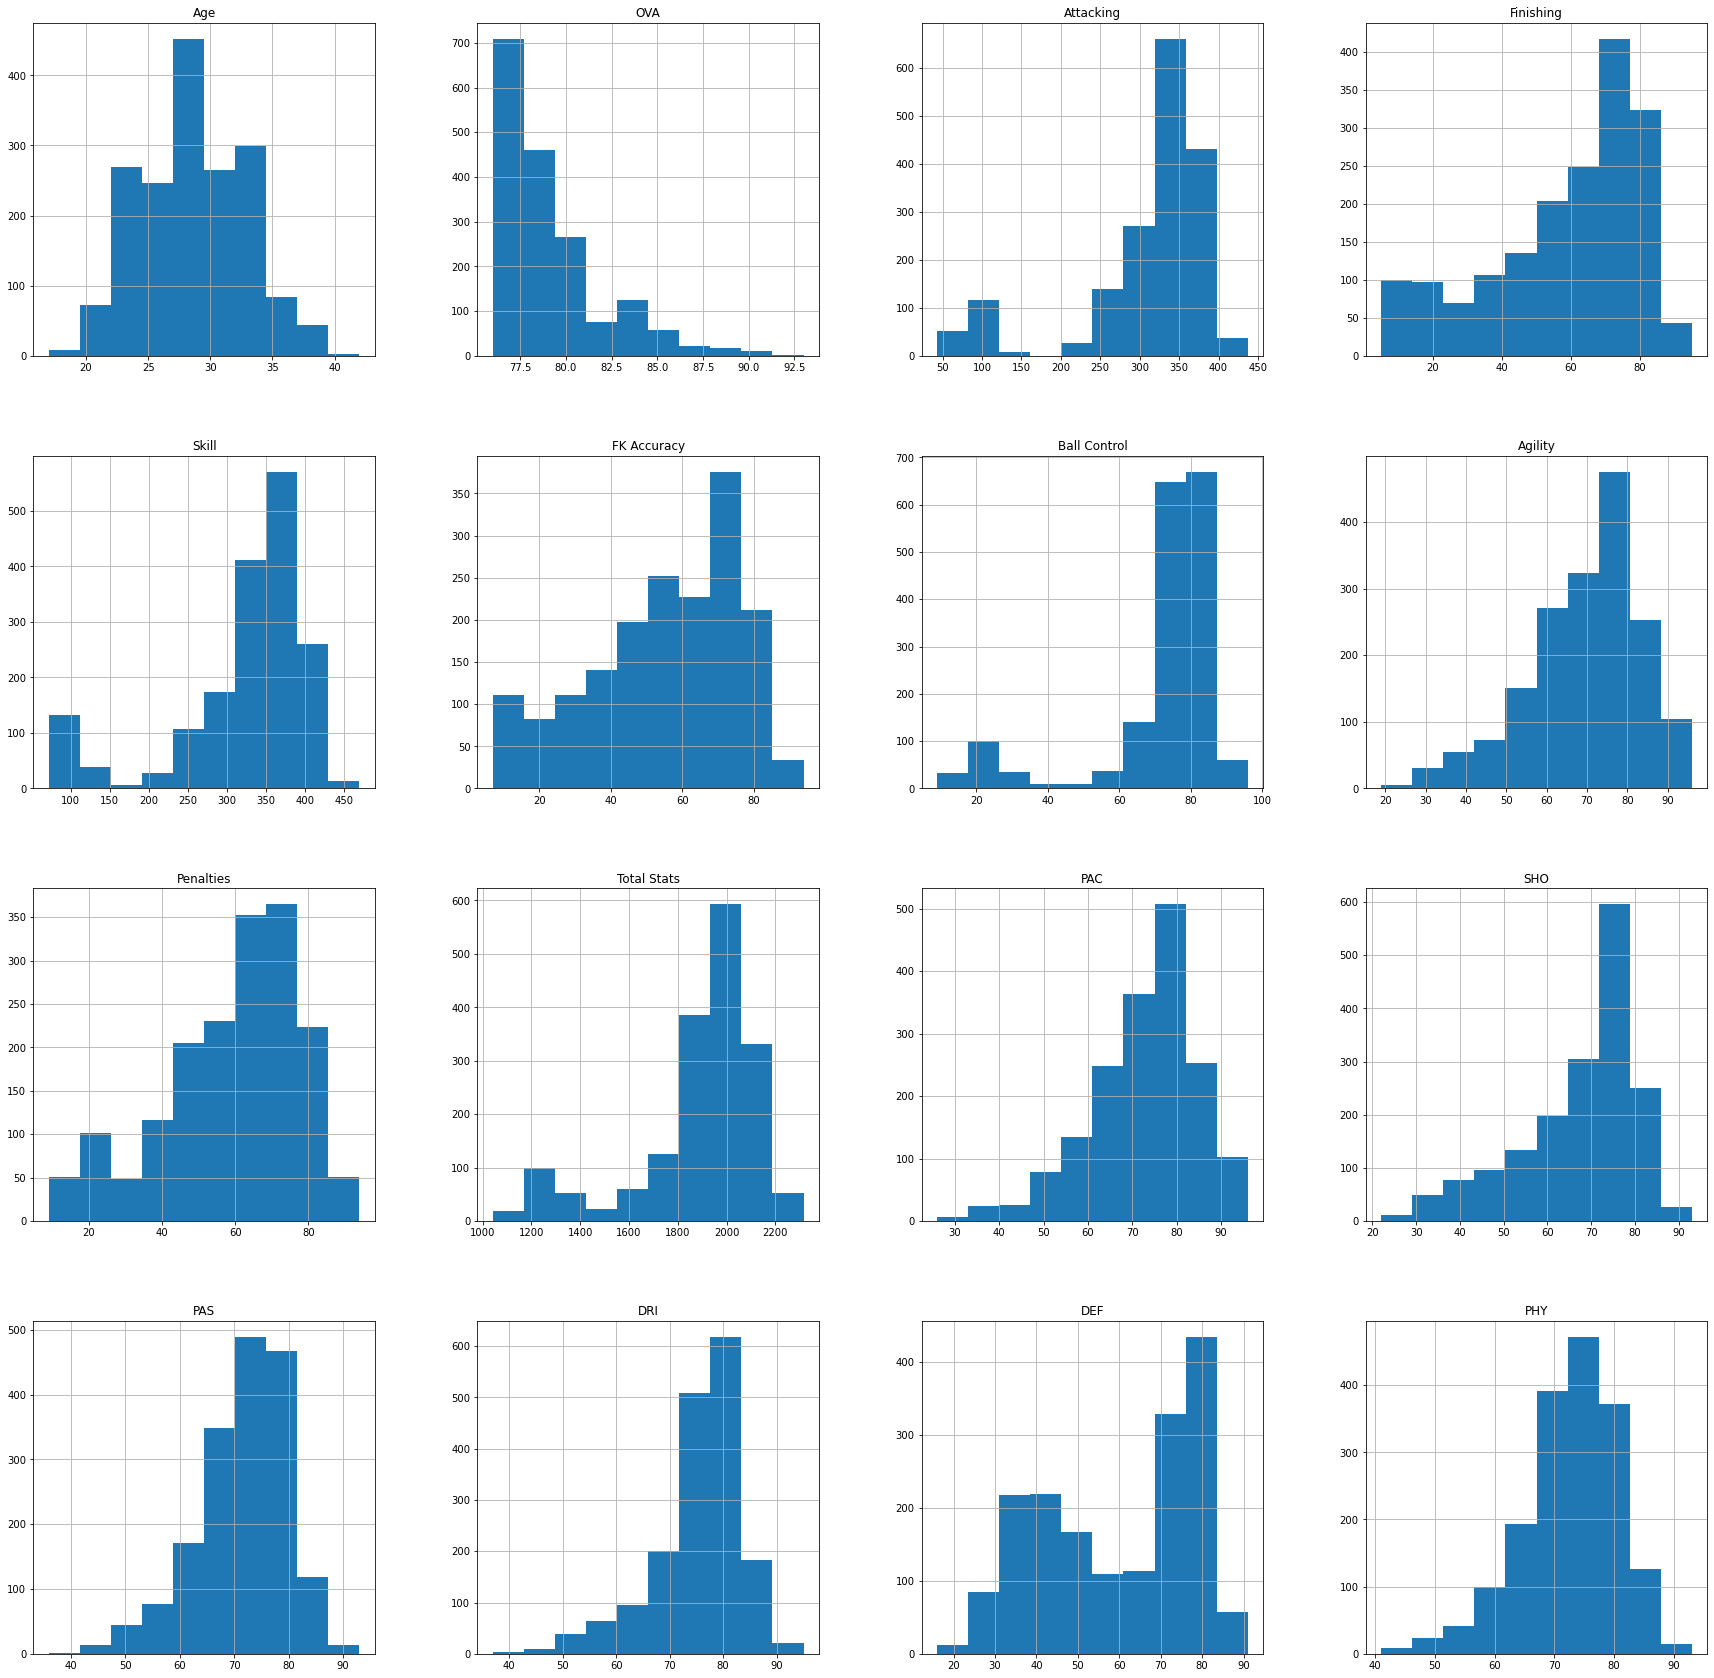

In [46]:
data.select_dtypes([np.number]).hist(figsize=(30,30))
plt.show()
#In the histograms show each of the possible columns that can be evaluated.  Looking at the data singularly we can see
#each data column shows predominatly a left skewed chart, with the exception of Age and OVA.  Age presents as a 
#traditional bell curve and OVA presents as a right skewed chart. In all charts with exception of age the outliers 
#are in the left region and in this area is where most of the outliers are that need to be ommitted for further analysi

In [54]:
data=data[["Attacking","Finishing","Skill","FK Accuracy","Ball Control","Agility","Penalties"]]
data.head(11)

#The focus is on these individual varibles in the table because the speak to a players basic ability in the most 
# that then builds on their compound stats. These are the crucial abilities and attributes of being an elite player 
#needed to win at clutch points in play.

,Attacking,Finishing,Skill,FK Accuracy,Ball Control,Agility,Penalties
0,367,69,408,70,90,79.000000,71
1,342,66,406,80,81,67.000000,85
2,380,70,402,78,79,72.000000,90
3,304,31,258,33,64,51.000000,32
4,394,65,393,67,87,68.000000,77
5,335,62,419,89,83,58.000000,70
6,380,84,374,63,84,77.000000,75
7,84,21,113,7,23,64.602273,21
8,90,21,128,10,22,64.602273,74
9,328,43,414,88,82,74.000000,79


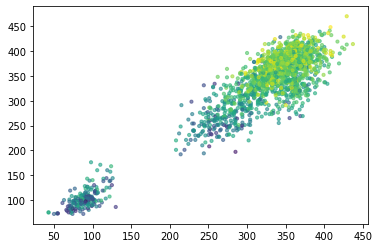

In [156]:
from matplotlib import colors as mcolors
import matplotlib.pyplot as plt
plt.scatter(data.Attacking, data.Skill, c=data.Agility, alpha = 0.6, s=10)
#C has to be added to give the color command for the chart

Text(0, 0.5, 'Skill')

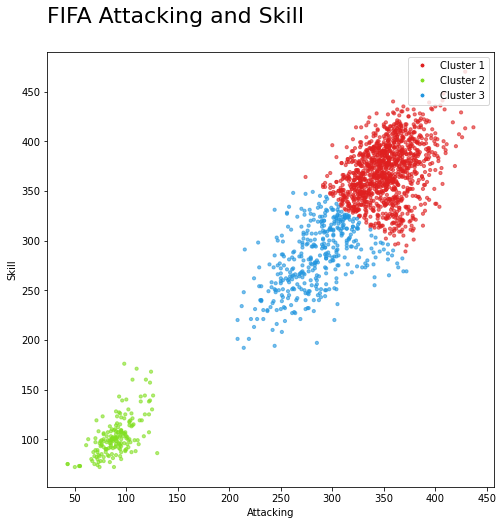

In [157]:
#Creating a Two Dimensional Cluster

# k means
kmeans = KMeans(n_clusters=3, random_state=0)
data['cluster'] = kmeans.fit_predict(data[['Attacking', 'Skill']])
# Get Centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## Add Data
data['cen_x'] = data.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
data['cen_y'] = data.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
data['c'] = data.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
#Plot Library
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(8,8))
# Plotting Data
plt.scatter(data.Attacking, data.Skill, c=data.c, alpha = 0.6, s=10)

#Create a List of Legend Elements
#markers & records
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
#Lengend
plt.legend(handles=legend_elements, loc='upper right')
#Input title & labels
plt.title('FIFA Attacking and Skill\n', loc='left', fontsize=22)
plt.xlabel('Attacking')
plt.ylabel('Skill')


Text(0, 0.5, 'Skill')

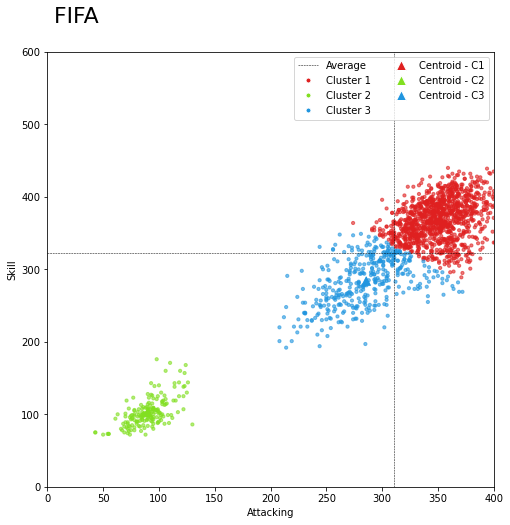

In [61]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(data.Attacking, data.Skill, c=data.c, alpha = 0.6, s=10)
# plot centroids
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
# plot Attack mean
plt.plot([data.Attacking.mean()]*2, [0,600], color='black', lw=0.5, linestyle='--')
plt.xlim(0,400)
# plot Skill mean
plt.plot([0,600], [data.Skill.mean()]*2, color='black', lw=0.5, linestyle='--')
plt.ylim(0,600)
# create a list of legend elemntes
## average line
legend_elements = [Line2D([0], [0], color='black', lw=0.5, linestyle='--', label='Average')]
## markers / records
cluster_leg = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
## centroids
cent_leg = [Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]
# add all elements to the same list
legend_elements.extend(cluster_leg)
legend_elements.extend(cent_leg)
# plot legend
plt.legend(handles=legend_elements, loc='upper right', ncol=2)
# title and labels
plt.title(' FIFA\n', loc='left', fontsize=22)
plt.xlabel('Attacking')
plt.ylabel('Skill')
#The chart below showcases the relationship between "Attacking and Skill".  The red cluster groups the highest attack 
#and Skill values, while the green has the lowest, and the blue group is generally closer to the average.


Text(0, 0.5, 'DEF')

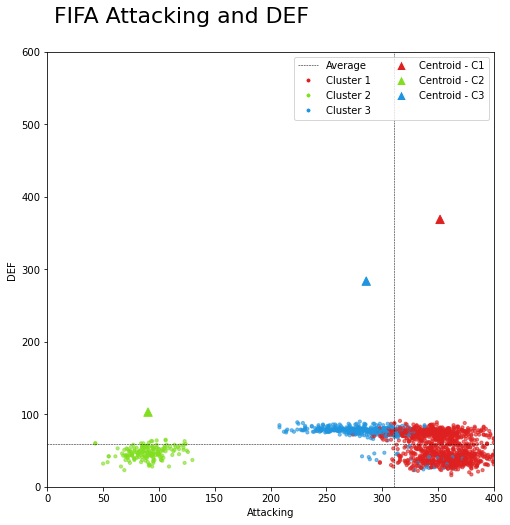

In [159]:
#Comparison 1

from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(data.Attacking, data.DEF, c=data.c, alpha = 0.6, s=10)
# plot centroids
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
# plot Attack mean
plt.plot([data.Attacking.mean()]*2, [0,600], color='black', lw=0.5, linestyle='--')
plt.xlim(0,400)
# plot DEF mean
plt.plot([0,600], [data.DEF.mean()]*2, color='black', lw=0.5, linestyle='--')
plt.ylim(0,600)
# create a list of legend elemntes
## average line
legend_elements = [Line2D([0], [0], color='black', lw=0.5, linestyle='--', label='Average')]
## markers / records
cluster_leg = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
## centroids
cent_leg = [Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]
# add all elements to the same list
legend_elements.extend(cluster_leg)
legend_elements.extend(cent_leg)
# plot legend
plt.legend(handles=legend_elements, loc='upper right', ncol=2)
# title and labels
plt.title(' FIFA Attacking and DEF\n', loc='left', fontsize=22)
plt.xlabel('Attacking')
plt.ylabel('DEF')

Text(0, 0.5, 'Penalties')

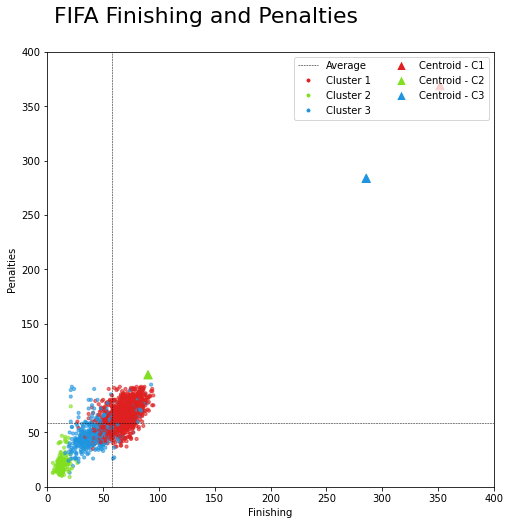

In [161]:
#Comparison 2

from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(data.Finishing, data.Penalties, c=data.c, alpha = 0.6, s=10)
# plot centroids
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
# plot Finishing mean
plt.plot([data.Finishing.mean()]*2, [0,600], color='black', lw=0.5, linestyle='--')
plt.xlim(0,400)
# plot Penalties mean
plt.plot([0,400], [data.Penalties.mean()]*2, color='black', lw=0.5, linestyle='--')
plt.ylim(0,400)
# create a list of legend elemntes
## average line
legend_elements = [Line2D([0], [0], color='black', lw=0.5, linestyle='--', label='Average')]
## markers / records
cluster_leg = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
## centroids
cent_leg = [Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]
# add all elements to the same list
legend_elements.extend(cluster_leg)
legend_elements.extend(cent_leg)
# plot legend
plt.legend(handles=legend_elements, loc='upper right', ncol=2)
# title and labels
plt.title(' FIFA Finishing and Penalties\n', loc='left', fontsize=22)
plt.xlabel('Finishing')
plt.ylabel('Penalties')

Text(0, 0.5, 'Skill')

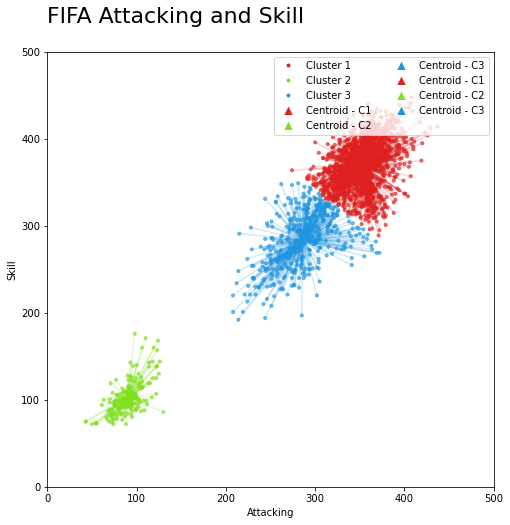

In [150]:
fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(data.Attacking, data.Skill, c=data.c, alpha = 0.6, s=10)
# plot centroids
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
# plot lines
for idx, val in data.iterrows():
    x = [val.Attacking, val.cen_x,]
    y = [val.Skill, val.cen_y]
    plt.plot(x, y, c=val.c, alpha=0.2)
# legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
                   markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
legend_elements.extend([Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)])
legend_elements.extend(cent_leg)
plt.legend(handles=legend_elements, loc='upper right', ncol=2)
# x and y limits
plt.xlim(0,500)
plt.ylim(0,500)
# title and labels
plt.title('FIFA Attacking and Skill\n', loc='left', fontsize=22)
plt.xlabel('Attacking')
plt.ylabel('Skill')

In [63]:
data_correlation = data.corr()

In [64]:
data_correlation

,Attacking,Finishing,Skill,FK Accuracy,Ball Control,Agility,Penalties,cluster,cen_x,cen_y
Attacking,1.000000,0.897702,0.933521,0.783005,0.941948,0.591832,0.823883,-0.482878,0.952565,0.948606
Finishing,0.897702,1.000000,0.817255,0.745141,0.805918,0.612452,0.833582,-0.592880,0.814990,0.830593
Skill,0.933521,0.817255,1.000000,0.890880,0.946712,0.660197,0.787331,-0.550094,0.939117,0.943036
FK Accuracy,0.783005,0.745141,0.890880,1.000000,0.764701,0.546806,0.778112,-0.596320,0.778391,0.796471
Ball Control,0.941948,0.805918,0.946712,0.764701,1.000000,0.619119,0.768066,-0.397932,0.948732,0.936019
Agility,0.591832,0.612452,0.660197,0.546806,0.619119,1.000000,0.487605,-0.504392,0.591309,0.610473
Penalties,0.823883,0.833582,0.787331,0.778112,0.768066,0.487605,1.000000,-0.490848,0.764893,0.772608
cluster,-0.482878,-0.592880,-0.550094,-0.596320,-0.397932,-0.504392,-0.490848,1.000000,-0.506924,-0.583322
cen_x,0.952565,0.814990,0.939117,0.778391,0.948732,0.591309,0.764893,-0.506924,1.000000,0.995844
cen_y,0.948606,0.830593,0.943036,0.796471,0.936019,0.610473,0.772608,-0.583322,0.995844,1.000000


<AxesSubplot:>

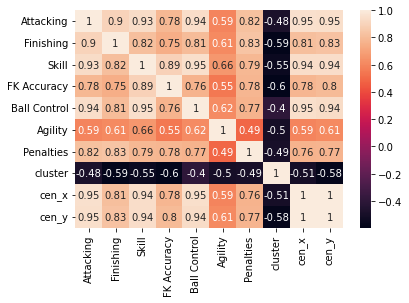

In [65]:
sns.heatmap(data_correlation, annot=True)
#The scatter plots above are further confirms the match ups to draw a conclusion below as they are to be good matches
#for analysis as they are within .2 or are 1. 

In [85]:
data.isna().sum()

Name            0
Age             0
OVA             0
Nationality     0
Attacking       0
Finishing       0
Skill           0
FK Accuracy     0
Ball Control    0
Agility         0
Penalties       0
Total Stats     0
PAC             0
SHO             0
PAS             0
DRI             0
DEF             0
PHY             0
Hits            0
dtype: int64

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [172]:
clb_cnt=data.groupby('Age').apply(lambda x:x['Name'].count()).reset_index(name='Counts')
clb_cnt.sort_values(by='Counts',ascending=False,inplace=True)
fig=px.scatter(clb_cnt,x='Age',y='Counts',color='Counts',title='Count of Player Age in FIFA 21 League')
fig.show()

#want this chart but OVA to Player Name > then OVA top against data scatter plot to show matching
#- cannot rectify argument to show***

In [171]:
#now will not run 3 legged test, unsure why
#was using code above but I making an error somewhere and the values keep presenting as a line and not as spread

TypeError: scatter() got an unexpected keyword argument 'z'

In [86]:
scaled = StandardScaler().fit_transform(numericals)

In [87]:
scaled

array([[ 1.80488452,  0.68311641,  0.68588079, ...,  1.1597323 ,
         0.17964373, -1.65156024],
       [ 2.28024169, -0.65735294,  0.38382457, ...,  0.18555717,
         0.12515034, -0.795614  ],
       [ 2.51792027, -0.3222356 ,  0.84295003, ...,  0.18555717,
        -1.01921086, -1.89611631],
       ...,
       [-1.76029422, -0.99247027,  0.06968609, ...,  0.30732906,
        -1.01921086, -1.1624481 ],
       [-2.71100855, -0.99247027,  0.27508432, ...,  0.42910095,
        -1.67313155, -2.38522845],
       [-1.9979728 , -0.3222356 ,  0.06968609, ...,  1.03796041,
        -1.29167781, -1.28472614]])

In [88]:
scaled = pd.DataFrame(scaled)

In [89]:
scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.804885,0.683116,0.685881,0.500532,0.986528,0.725319,1.033491,0.690332,0.647116,0.492072,-1.194564,0.206542,1.664341,1.159732,0.179644,-1.651560
1,2.280242,-0.657353,0.383825,0.362555,0.963451,1.210387,0.523139,-0.183934,1.407868,0.503997,-2.371904,0.282620,1.416946,0.185557,0.125150,-0.795614
2,2.517920,-0.322236,0.842950,0.546525,0.917296,1.113373,0.409727,0.180343,1.679565,0.193946,-1.026373,0.358698,1.664341,0.185557,-1.019211,-1.896116
3,1.567206,-0.992470,-0.075301,-1.247175,-0.744275,-1.069431,-0.440861,-1.349623,-1.472122,-0.461932,-0.437703,-2.380120,-0.562208,-2.736968,1.160525,0.182610
4,2.042563,0.347999,1.012102,0.316563,0.813448,0.579799,0.863374,-0.111079,0.973153,0.694798,-1.615043,0.663011,1.911735,0.429101,-0.038330,-1.407004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738,0.854170,-0.657353,-0.051136,-0.511298,0.317284,-0.050789,0.353021,1.200321,-0.602691,0.448347,0.487350,-0.858554,-0.314814,0.185557,0.670084,-0.551058
1739,0.616492,0.347999,0.613387,1.144424,-0.305805,-0.147802,0.239609,0.180343,0.158061,-0.362557,0.655541,0.967325,-1.922877,-0.179759,-1.673132,0.916278
1740,-1.760294,-0.992470,0.069686,0.638509,0.513442,0.919346,0.239609,0.836044,0.592777,0.074695,-0.017224,0.663011,0.179975,0.307329,-1.019211,-1.162448
1741,-2.711009,-0.992470,0.275084,0.776486,0.132665,-0.487350,0.296315,1.418888,0.810134,-0.338707,1.328307,0.282620,-0.438511,0.429101,-1.673132,-2.385228


In [90]:
encoded = OneHotEncoder(drop='first').fit_transform(categoricals).toarray()  #why error

In [91]:
categoricals.shape

(1743, 3)

In [92]:
encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [94]:
encoded = pd.DataFrame(encoded)

In [96]:
numericals = data.select_dtypes('number')
categoricals = data.select_dtypes('object')

In [123]:
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size= 0.1, random_state=100)

In [124]:
x_train.shape

(1568, 22)

In [128]:
len(y_train)

1568

In [129]:
x_test.shape

(175, 22)

In [131]:
lm = LinearRegression()
lm.fit(x_train , y_train)
#removed all NaN values - all data is numerical except name, why can this not be ran properly***

ValueError: could not convert string to float: 'O. Shatov'

In [50]:
categoricals = ["Attacking","Finishing","Skill","FK Accuracy","Ball Control","Agility","Penalties"]

In [ ]:
(data,'Total Stats',0.1)  #need for final round analysis with OVA and Name grouping

#Conclusion

#Should the test worked I believe that the best MVP would have been Maxwell, Oblak or Messi, based upon my analysis before I could not run the x/y test